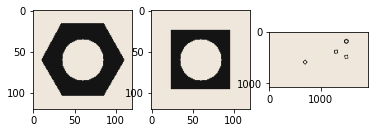

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

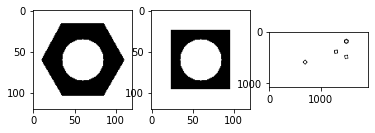

In [2]:
hexnut_template_gray = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)
ret1,th1 = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(th1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(th2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(th3, cv.COLOR_RGB2BGR))
plt.show()

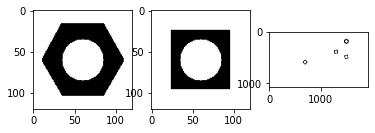

In [3]:
kernel = np.ones((3,3),np.uint8)
closing_1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing_2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing_3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(closing_1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closing_2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closing_3, cv.COLOR_RGB2BGR))
plt.show()

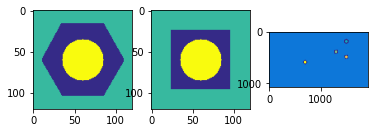

Detected Connected Components in hexnut_template Image:  3
Detected Connected Components in squarenut_template Image:  3
Detected Connected Components in conveyor_f100 Image:  6
 The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction:  11
 The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction:  16
 The horizontal size of the bounding box:  99
 The vertical size of the bounding box:  88
 The total area (in pixels) of the connected component:  4722 



In [4]:
connectivity = 4  

retval_1, labels_1, stats_1, centroids_1 = cv.connectedComponentsWithStats(closing_1, connectivity, cv.CV_32S)
retval_2, labels_2, stats_2, centroids_2 = cv.connectedComponentsWithStats(closing_2, connectivity, cv.CV_32S)
retval_3, labels_3, stats_3, centroids_3 = cv.connectedComponentsWithStats(closing_3, connectivity, cv.CV_32S)
colormapped_1 = cv.applyColorMap((labels_1/np.amax(labels_1)*255).astype('uint8'), cv.COLORMAP_PARULA)
colormapped_2 = cv.applyColorMap((labels_2/np.amax(labels_2)*255).astype('uint8'), cv.COLORMAP_PARULA)
colormapped_3 = cv.applyColorMap((labels_3/np.amax(labels_3)*255).astype('uint8'), cv.COLORMAP_PARULA)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(colormapped_1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(colormapped_2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(colormapped_3, cv.COLOR_RGB2BGR))
plt.show()
print("Detected Connected Components in hexnut_template Image: ", len(stats_1))
print("Detected Connected Components in squarenut_template Image: ", len(stats_2))
print("Detected Connected Components in conveyor_f100 Image: ", len(stats_3))

print(" The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction: ", stats_1[0,0])
print(" The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction: ", stats_1[0,1])
print(" The horizontal size of the bounding box: ", stats_1[0,2])
print(" The vertical size of the bounding box: ", stats_1[0,3])
print(" The total area (in pixels) of the connected component: ", stats_1[0,4],'\n')



Stats is a matrix contains the <br>
The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction<br>
The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction<br>
The horizontal size of the bounding box<br>
The vertical size of the bounding box<br>
The total area (in pixels) of the connected component<br>
in each column of the matrix

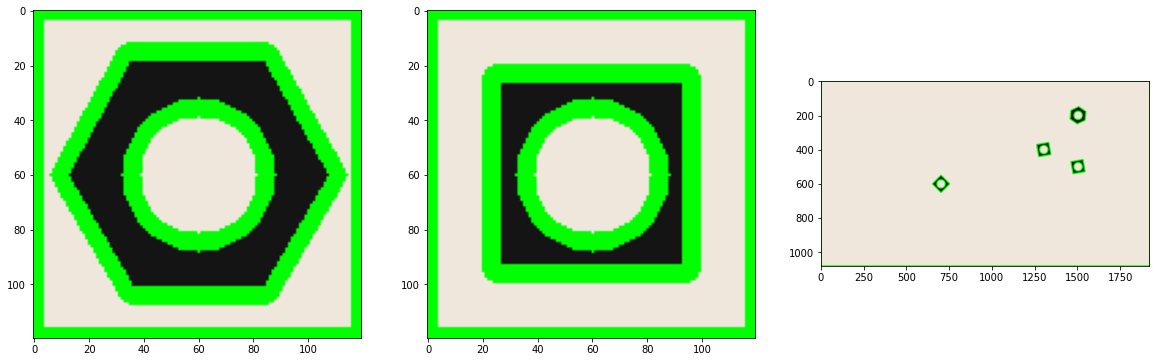

In [5]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

contours_1, hierarchy_1 = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(hexnut_template, contours_1, -1, (0,255,0), 5)
contours_2, hierarchy_2 = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(squarenut_template, contours_2, -1, (0,255,0), 5)
contours_3, hierarchy_2 = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(conveyor_f100, contours_3, -1, (0,255,0), 5)

fig, ax = plt. subplots(1,3,figsize = (20,20))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [6]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [7]:
count = 0
for i in contours_3[1:]:
    ret = cv.matchShapes(contours_1[1],i,1,0.0)
    if ret < 10**(-3):
        count += 1
print("Count of hexaganal nuts in conveyor_f100: ", count)

Count of hexaganal nuts in conveyor_f100:  1


In [9]:
# Yor code here.
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def areaCheck(areas,contours):
    newCont = []
    for k,i in enumerate(areas):
        count = 0
        for j in areas:
            if abs(i-j) <100:
                count += 1
        if count > len(areas)/2:
            newCont.append(contours[k+1])
    return newCont

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []   
frame_array = []
shape = (1080, 1920, 3)
hex_nuts = 0
sqr_nuts = 0
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    frame_gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    ret3,th = cv.threshold(frame_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(frame, contours, -1, (0,255,0), 3)
    count_hex = 0
    count_sqr = 0
    areas = []
    for i in contours[1:]:
        area = cv.contourArea(i)
        areas.append(area)
    newCont = areaCheck(areas, contours)
    for i in contours[1:]:
        res_1 = cv.matchShapes(contours_1[1],i,1,0.0)
        res_2 = cv.matchShapes(contours_2[1],i,1,0.0)
        if res_1 < 10**(-3):
            count_hex += 1
    
        if res_2 < 10**(-3):
            count_sqr += 1
    
    hex_nuts += count_hex
    sqr_nuts += count_sqr

    text = 'Frame:' + str(f) 
    text2 = "Num of hexagonal nuts in current frame: " + str(count_hex)
    text3 = "Num of square nuts in current frame: " + str(count_sqr)
    text4 = "Total hex nuts: " + str(hex_nuts)
    text5 = "Total square nuts: " + str(sqr_nuts)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text2 , (100, 140), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text3 , (100, 180), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text4 , (100, 220), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    cv.putText(frame,text5 , (100, 260), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    frame_array.append(frame)
    cv.imshow('Conveyor', frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

#Video write
out = cv.VideoWriter('D:/Study Materials/Sem 4/EN2550 - Fundamentals of Image Processing and Machine Vision/conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
